In [5]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram

from arithmetic import *

# Multicontrolled classical bit addition

In [6]:
control_qr = QuantumRegister(2)
result_qr = QuantumRegister(4)
carry_qr = QuantumRegister(3)
ancilla_qr = QuantumRegister(2)
cond_qr = QuantumRegister(1)
c = ClassicalRegister(8)
qc = QuantumCircuit(ancilla_qr, control_qr, result_qr, carry_qr, cond_qr, c)

qc.x(result_qr[0])
qc.x(result_qr[2])

qc.x(control_qr[0])
qc.x(control_qr[1])

mc_add_classical(qc, control_qr, 3, result_qr, carry_qr, cond_qr, ancilla_qr=ancilla_qr)
qc.measure(list(result_qr) + list(carry_qr) + [ cond_qr[0] ], c)
#qc.draw(output="mpl")

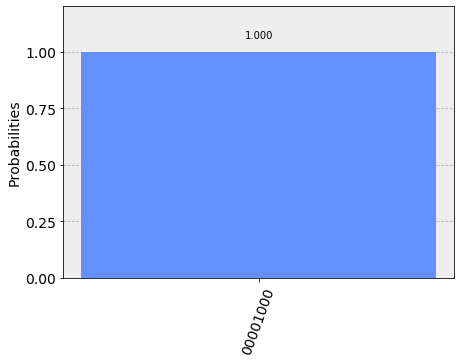

In [4]:
job = execute(qc, backend=BasicAer.get_backend("qasm_simulator"), shots=100)
result = job.result()
plot_histogram(result.get_counts(qc))